# Logistic Regression

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
data=pd.read_csv("C:/Users/Dayakar Reddy Sura/Downloads/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data1=data.copy()

In [6]:
data2=data1.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
data2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
data2[data2.duplicated(keep=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
4,0,3,male,35.0,0,0,8.0500,S
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
32,1,3,female,NaN,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [10]:
data3=data2.drop_duplicates()
data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
data3[data3.duplicated(keep=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [12]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       676 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [13]:
data3.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: >

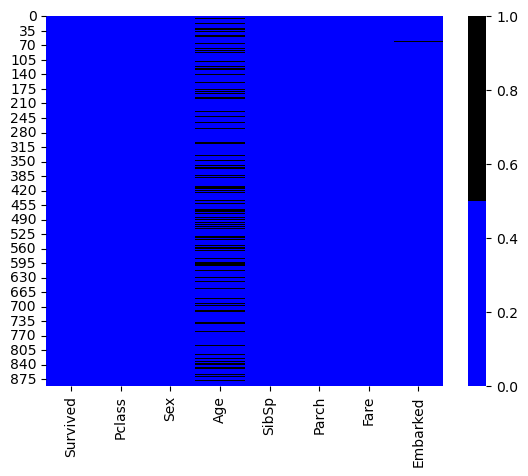

In [14]:
cols = data2.columns
colors=['Blue','Black']
sn.heatmap(data2[cols].isnull(),cmap=sn.color_palette(colors))

In [15]:
data3['Age']=data3.Age.fillna(data3['Age'].mean())
data3['Embarked']=data3.Embarked.fillna(data3['Embarked'].mode()[0])

C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_7852\2788187365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Age']=data3.Age.fillna(data3['Age'].mean())
C:\Users\Dayakar Reddy Sura\AppData\Local\Temp\ipykernel_7852\2788187365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Embarked']=data3.Embarked.fillna(data3['Embarked'].mode()[0])


In [16]:
data3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
data3.Survived.describe()

count    780.000000
mean       0.412821
std        0.492657
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [18]:
data3.Pclass.describe()

count    780.000000
mean       2.246154
std        0.854452
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [19]:
data3['Sex'].value_counts()

Sex
male      488
female    292
Name: count, dtype: int64

In [20]:
data3.Age.describe()

count    780.000000
mean      29.812751
std       13.708828
min        0.420000
25%       21.750000
50%       29.812751
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
data3.SibSp.describe()

count    780.000000
mean       0.525641
std        0.988046
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
data3.Parch.describe()

count    780.000000
mean       0.417949
std        0.838536
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: Parch, dtype: float64

In [23]:
data3.Fare.describe()

count    780.000000
mean      34.829108
std       52.263440
min        0.000000
25%        8.050000
50%       15.950000
75%       34.375000
max      512.329200
Name: Fare, dtype: float64

In [24]:
data3['Embarked'].value_counts()

Embarked
S    567
C    155
Q     58
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

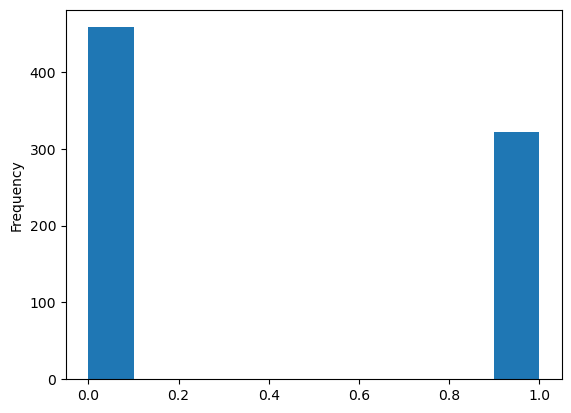

In [25]:
data3.Survived.plot(kind='hist')

<Axes: ylabel='Density'>

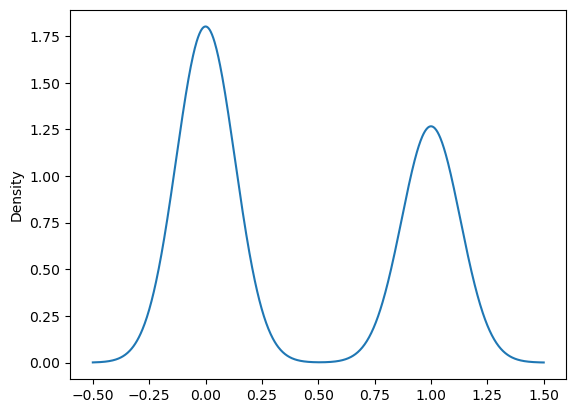

In [26]:
data3.Survived.plot(kind='kde')

<Axes: ylabel='Frequency'>

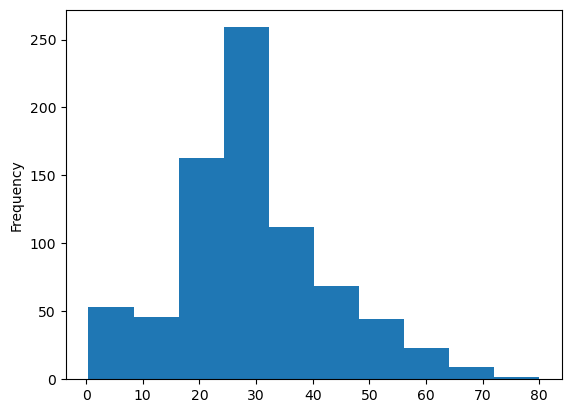

In [27]:
data3.Age.plot(kind='hist')

<Axes: >

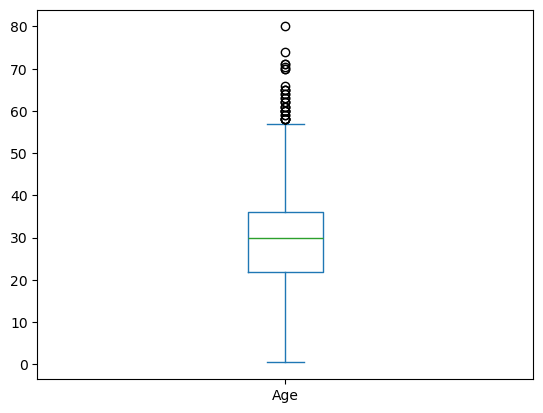

In [28]:
data3.Age.plot(kind='box')

<Axes: ylabel='Density'>

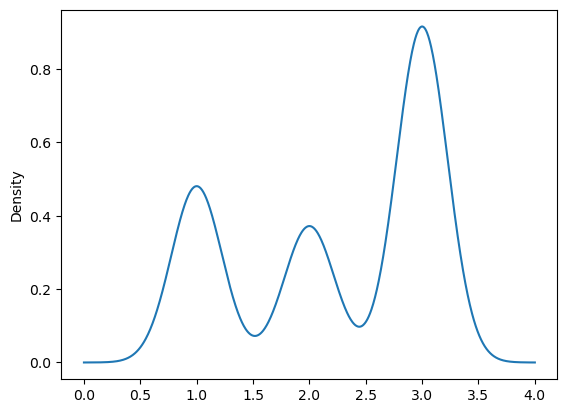

In [29]:
data3.Pclass.plot(kind='kde')

<Axes: xlabel='Sex'>

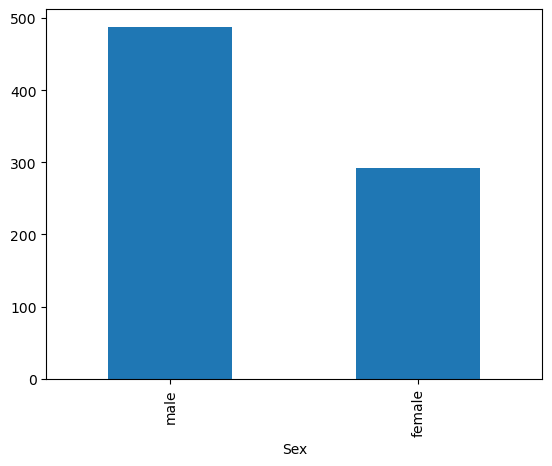

In [30]:
data3['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

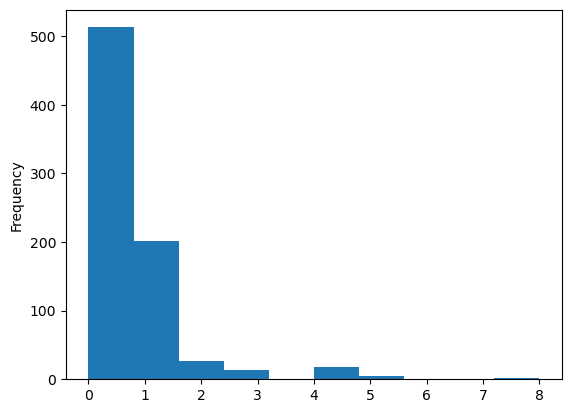

In [31]:
data3.SibSp.plot(kind='hist')

<Axes: >

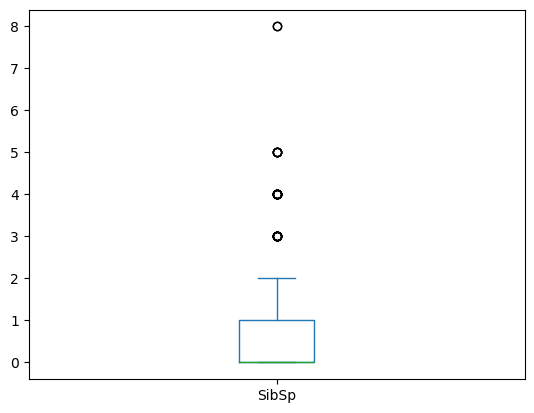

In [32]:
data3.SibSp.plot(kind='box')

<Axes: ylabel='Frequency'>

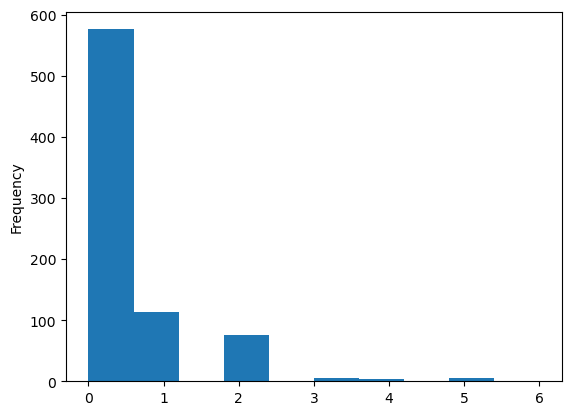

In [33]:
data3.Parch.plot(kind='hist')

<Axes: >

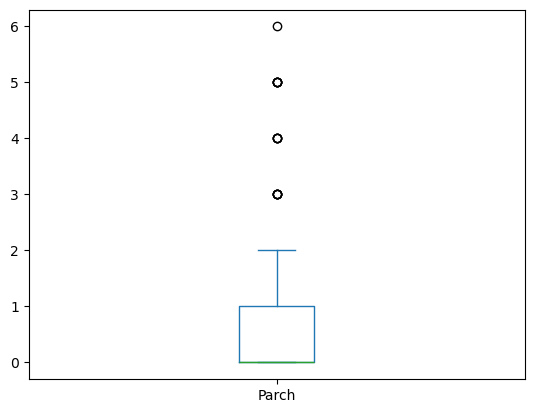

In [34]:
data3.Parch.plot(kind='box')

<Axes: ylabel='Frequency'>

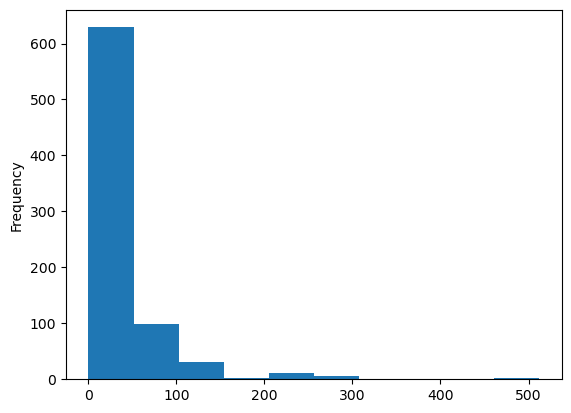

In [35]:
data3.Fare.plot(kind='hist')

<Axes: xlabel='Embarked'>

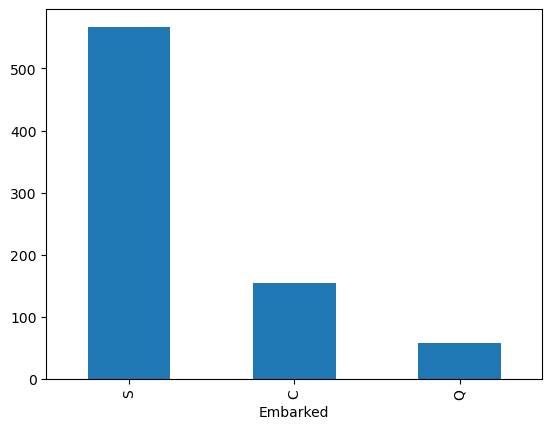

In [36]:
data3['Embarked'].value_counts().plot(kind='bar')

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

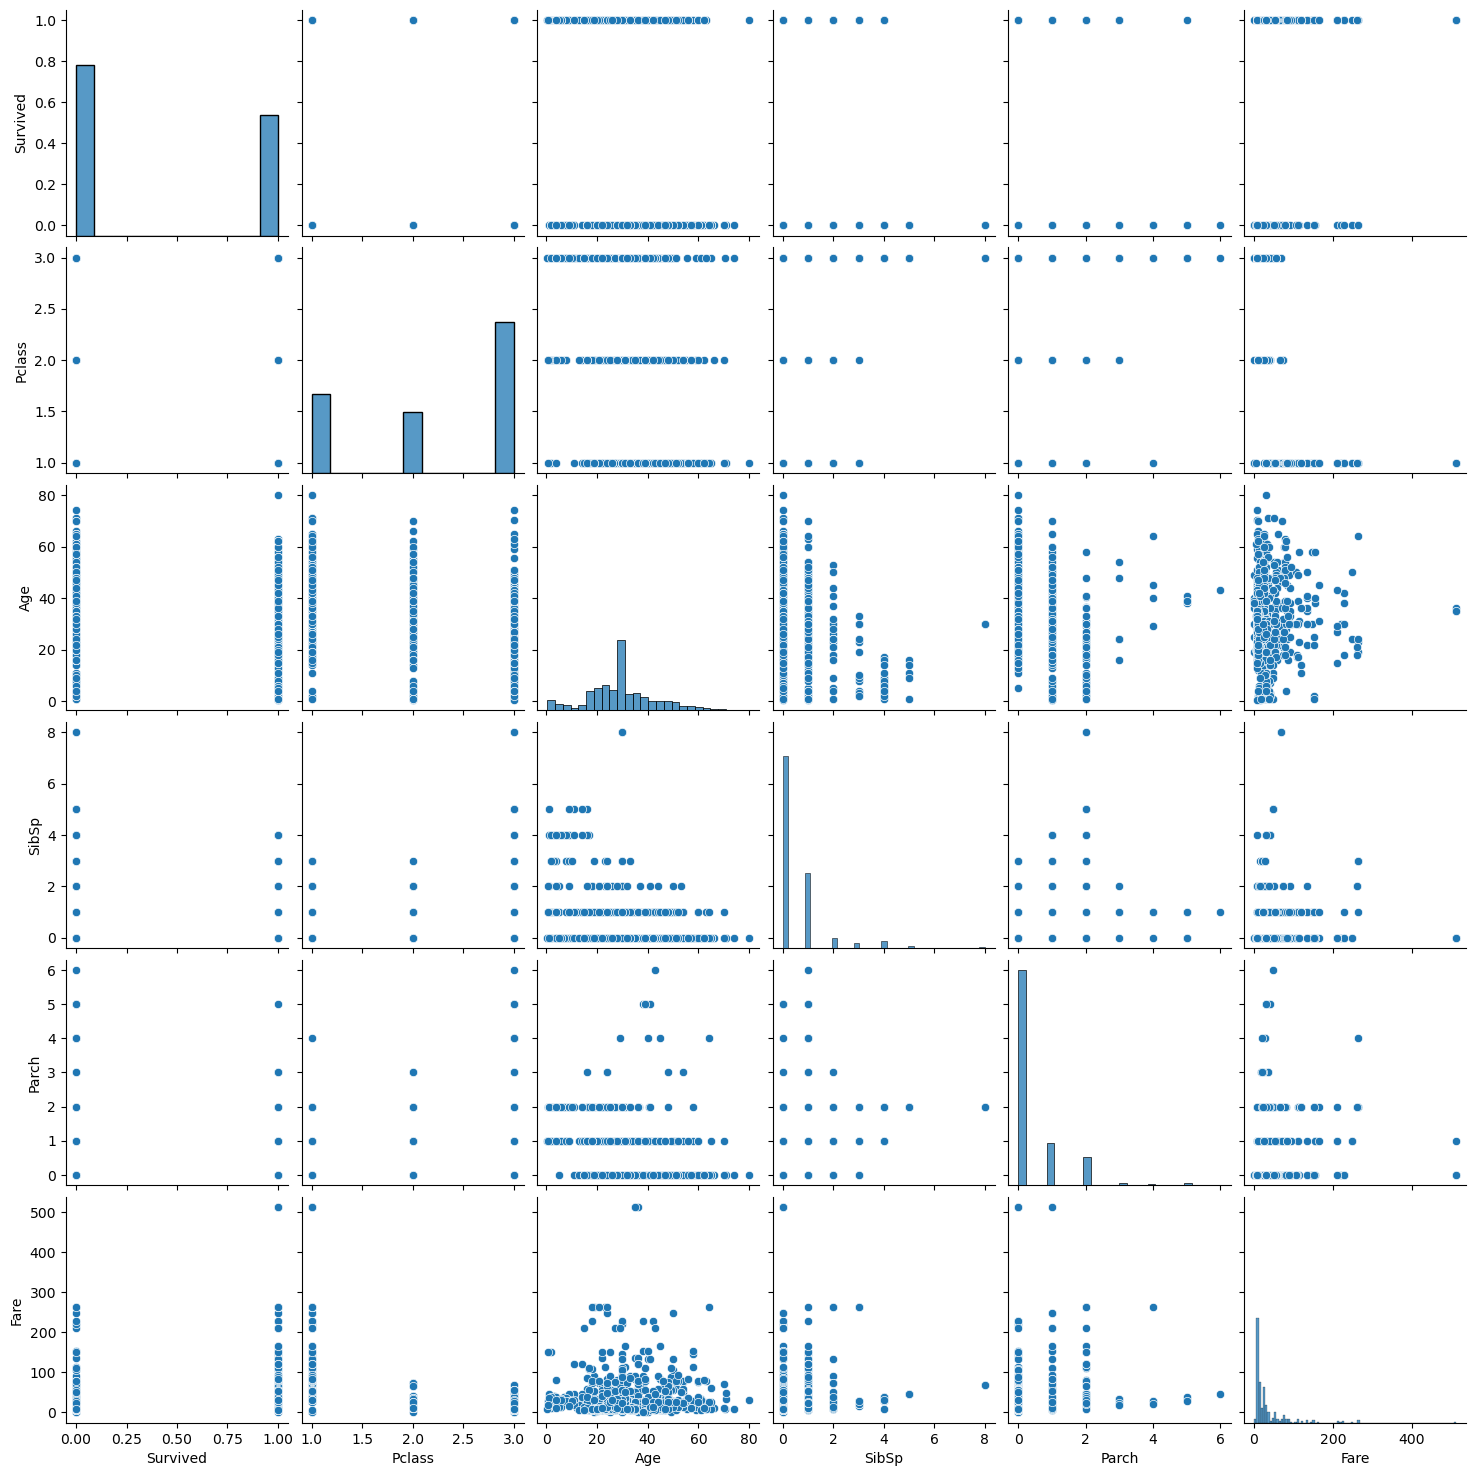

In [38]:
sn.pairplot(data3)

In [40]:
data4=pd.get_dummies(data3,dtype=int)
data4

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,1,0,0,1,0
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.812751,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [41]:
data4.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.336244,-0.079277,-0.037597,0.069669,0.246669,0.513615,-0.513615,0.169752,-0.039142,-0.128985
Pclass,-0.336244,1.000000,-0.338325,0.086788,0.038975,-0.552440,-0.117507,0.117507,-0.248909,0.210159,0.099177
Age,-0.079277,-0.338325,1.000000,-0.280082,-0.187311,0.090414,-0.093589,0.093589,0.038727,-0.017213,-0.024549
SibSp,-0.037597,0.086788,-0.280082,1.000000,0.380596,0.134127,0.097959,-0.097959,-0.063366,-0.002411,0.058172
Parch,0.069669,0.038975,-0.187311,0.380596,1.000000,0.191055,0.236962,-0.236962,-0.022168,-0.065551,0.058454
Fare,0.246669,-0.552440,0.090414,0.134127,0.191055,1.000000,0.169307,-0.169307,0.275371,-0.109335,-0.182246
Sex_female,0.513615,-0.117507,-0.093589,0.097959,0.236962,0.169307,1.000000,-1.000000,0.086134,0.043289,-0.102634
Sex_male,-0.513615,0.117507,0.093589,-0.097959,-0.236962,-0.169307,-1.000000,1.000000,-0.086134,-0.043289,0.102634
Embarked_C,0.169752,-0.248909,0.038727,-0.063366,-0.022168,0.275371,0.086134,-0.086134,1.000000,-0.141147,-0.812508
Embarked_Q,-0.039142,0.210159,-0.017213,-0.002411,-0.065551,-0.109335,0.043289,-0.043289,-0.141147,1.000000,-0.462431


## Model Building

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
x= data4.iloc[:,1:]
y= data4.iloc[:,0]

In [45]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred=classifier.predict(x)

In [49]:
y_pred_data= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})
y_pred_data

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
887,1,1
888,0,0
889,1,1


In [50]:
# confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[382  76]
 [ 97 225]]


In [52]:
((382+225)/(382+76+97+225))*100

77.82051282051282

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       458
           1       0.75      0.70      0.72       322

    accuracy                           0.78       780
   macro avg       0.77      0.77      0.77       780
weighted avg       0.78      0.78      0.78       780



### ROC Curve

Text(0, 0.5, 'True Positive Rate')

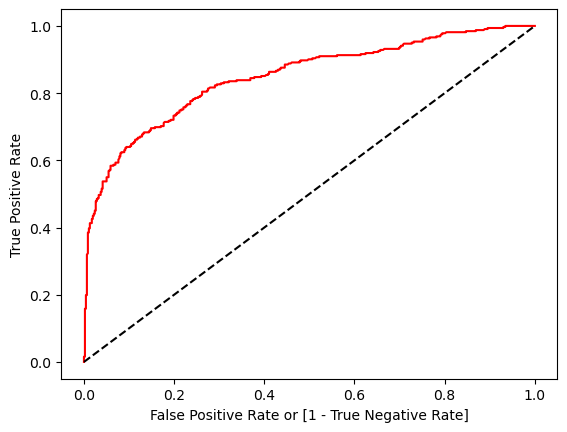

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logistic model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### In logistic regression, the coefficients represent the log-odds of the target variable associated with each predictor variable (features).

##### -> A positive coefficient means that as the corresponding predictor variable increases, the log-odds of the target variable (survival probability) also increase. A negative coefficient means that as the predictor variable increases, the log-odds of the target variable decrease.

##### ->  Evaluate the statistical significance of each coefficient. This is typically done using p-values. Lower p-values (< 0.05) indicate that the coefficient is statistically significant, suggesting that the corresponding feature has a significant effect on predicting survival probability.

##### -> Interpret the coefficients in the context of the specific problem domain. For instance, if a coefficient for "Age" is significant and positive, it implies that older individuals may have higher odds of survival, all else being equal

##### -> Compare the coefficients across different features to understand their relative importance in predicting survival probability. Features with larger coefficients (in absolute value) generally have a greater impact on the predicted outcome.

### Using testing data

In [57]:
test=pd.read_csv("C:/Users/Dayakar Reddy Sura/Downloads/Titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
test2=test.drop(['PassengerId','Ticket','Name','Cabin',],axis=1)
test2.shape

(418, 7)

In [98]:
test2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [99]:
test2['Age']=test2.Age.fillna(test2['Age'].mean())
test2['Fare']=test2.Fare.fillna(test2['Fare'].mean())

In [100]:
test3=pd.get_dummies(test2,dtype=int)
test3

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [101]:
test3.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [102]:
test_y1 =classifier.predict(test3)
test_y1_df=pd.DataFrame({'Predicted_prob': test_y1,'Pclass':test3.Pclass,'Age':test3.Age,'SibSp':test3.SibSp,'Parch':test3.Parch,'Fare':test3.Fare,
                         'Sex_female':test3.Sex_female,'Sex_male':test3.Sex_male,
                         'Embarked_C':test3.Embarked_C,'Embarked_Q':test3.Embarked_Q,'Embarked_S':test3.Embarked_S})

In [103]:
auc

0.7664094496731672

In [104]:
test_y1_df

,Predicted_prob,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,0,3,47.00000,1,0,7.0000,1,0,0,0,1
2,0,2,62.00000,0,0,9.6875,0,1,0,1,0
3,0,3,27.00000,0,0,8.6625,0,1,0,0,1
4,1,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,1,39.00000,0,0,108.9000,1,0,1,0,0
415,0,3,38.50000,0,0,7.2500,0,1,0,0,1
416,0,3,30.27259,0,0,8.0500,0,1,0,0,1


### 1. What is the difference between precision and recall?

###### Precision:
Precision is a measure of the accuracy of the positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many are actually positive?"

Mathematically, precision is defined as:
Precision
=
True Positives
True Positives
+
False Positives
Precision= 
True Positives+False Positives
True Positives
​
 

True Positives (TP): The number of correctly predicted positive instances.
False Positives (FP): The number of instances predicted as positive that are actually negative.
Precision focuses on minimizing false positives. A high precision indicates that when the model predicts a positive result, it is highly likely to be correct.

Recall:
Recall, also known as sensitivity or true positive rate, measures the completeness of the positive predictions made by the model. It answers the question: "Of all the actual positive instances, how many did the model correctly predict as positive?"

Mathematically, recall is defined as:
Recall
=
True Positives
True Positives
+
False Negatives
Recall= 
True Positives+False Negatives
True Positives
​
 

False Negatives (FN): The number of instances that are actually positive but were predicted as negative.
Recall focuses on minimizing false negatives. A high recall indicates that the model is able to correctly identify most of the positive instances.

### 2. What is cross-validation, and why is it important in binary classification?

###### ->Cross-validation involves partitioning the data into multiple subsets (folds), training the model on several combinations of these subsets, and evaluating its performance on the remaining parts.

##### -> Performance Estimation: Cross-validation provides a more reliable estimate of a model's performance compared to a single train-test split. By averaging performance metrics across multiple folds, it reduces the variance of the performance estimate and gives a better indication of how the model is likely to perform on unseen data.

Bias-Variance Trade-off: It helps in understanding and managing the bias-variance trade-off in model training. A model with high variance might perform well on a specific train-test split but poorly on other splits (indicating overfitting). Cross-validation provides a way to detect and mitigate such issues by averaging performance across different data partitions.

Model Selection: Cross-validation aids in comparing different models or different configurations of the same model. By evaluating each model across multiple folds, you can identify which one performs consistently well across different subsets of data, thereby helping in model selection.

Imbalanced Data: In binary classification, where the classes are imbalanced (e.g., one class is much less frequent than the other), cross-validation helps in ensuring that the model's performance metrics are not skewed by the imbalance. It ensures that the model's ability to correctly predict both classes is adequately evaluated.

Hyperparameter Tuning: Cross-validation is essential when tuning model hyperparameters (e.g., regularization strength, decision threshold in logistic regression, etc.). It allows you to assess the impact of different hyperparameter values on model performance across multiple validation folds, helping in selecting optimal hyperparameters.

Robustness: By testing the model on multiple folds of the data, cross-validation provides a more robust assessment of its generalizability. It reduces the risk of overfitting to a specific train-test split and provides a more realistic expectation of how the model will perform on new, unseen data.

In [105]:
import pickle
filename = 'Survived.pkl'
pickle.dump(classifier,open(filename,'wb'))